In [1]:
import pandas as pd
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
import random
import seaborn

In [2]:
#Load the input data
data = scipy.io.loadmat("C://Users/Home/Downloads/AllSamples.mat") 

In [3]:
dataFrame = pd.DataFrame(data['AllSamples'])
df = pd.DataFrame({'X':dataFrame[0],'Y':dataFrame[1]})
df.head()

,X,Y
0,2.059249,7.205988
1,8.875781,8.960924
2,8.007064,2.775320
3,5.017288,3.763120
4,6.390562,5.179565


In [4]:
#Convert df to array for calculation purpose
X = np.array(df)

<AxesSubplot:xlabel='X', ylabel='Y'>

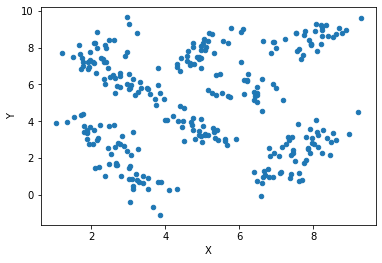

In [5]:
#visualizing the dataset in scatter plot before clustering
df.plot.scatter(x='X',y='Y')

In [6]:
#method to calculate sum of squared error
def calcSSE(muLst,df,K):
    
    k = df[K].max()
    sseSum=0
    X2=np.array(muLst)
    
    for j in range(1,k+1):
        a = df[K]==j
        b = df[a]
        X1 = np.array(b.iloc[:,0:2])
        for i in range(0,len(X1)):
            sseSum+= sum((X2[j-1] - X1[i])**2)
    
    return sseSum

In [7]:
#method to assignClusters after calculating Eucledian distance between a selected centroid and the datapoints
def assignCluster(eucledianDistList):
    index = eucledianDistList.index(min(eucledianDistList))
    return index+1

In [8]:
#method to initialize centroids
def init_centroid(k,df):    
    
    i=0 
    centroidDF = df #Load the df into a new DataFrame object for calculation purpose
    randomCentroidList=[] #List to hold all centroid values for the given value of K
    
    X2 = np.array(centroidDF.iloc[:,0:2])
    
    centroid_index = random.sample(range(0, len(centroidDF)), 1)#get first random centroid and store it in centroid_index list
    randomCentroidList = centroidDF.iloc[centroid_index,0:2]
    
    index = centroid_index[0] #get the index of the selected centroid point
    centroidDF = centroidDF.drop(index) #drop the selected centroid so that it doesn't appear again
    centroidDF.reset_index(drop=True, inplace=True)
    
    #loop to find the centroids
    while i<(k-1):
        X2 = np.array(centroidDF.iloc[:,0:2])
        avg = np.array(randomCentroidList)
        if(i>0):          
            x = np.mean(avg[:,0])
            y = np.mean(avg[:,1])
            avg = np.array([x,y])
        
        #iterate through the dataFrame to find the farthest datapoint
        for j in range(0,len(X2)):
            
                dist = np.sqrt(np.sum((avg - X2[j])**2))
                dist = round(dist)
                
                #If construct to find the farthest data point
                if j == 0:
                    maxDist = dist
                else:
                    if dist>maxDist:
                        maxDist = dist
                        index = j
        randomCentroidList = randomCentroidList.append(centroidDF.iloc[index,0:2])
        centroidDF = centroidDF.drop([index]) #remove the farthest datapoint from the dataFrame so that it does nto appear again
        centroidDF.reset_index(drop=True, inplace=True)
        i+=1
    
    return randomCentroidList

In [9]:
#Objective Function to measure the eucledian distance
def eucledianFunction(X1,X2):
    
    clusterList = [] #list to hold the assigned cluster value after grouping
    val = 0
    for i in range(0,len(X2)):
        dist_list=[] #list to hold the eucledian distance value of a given datapoint from each of the centroids
        for j in range(0,len(X1)):            
            diff = np.sqrt(np.sum((X2[i] - X1[j])**2))
            dist_list.append(diff)            
        clusterList.append(assignCluster(dist_list))
    return clusterList


 Iteration : 1

 Clustering for K = 2

 Centroids initialized for K = 2

 End of K = 2

 Clustering for K = 3

 Centroids initialized for K = 3

 End of K = 3

 Clustering for K = 4

 Centroids initialized for K = 4

 End of K = 4

 Clustering for K = 5

 Centroids initialized for K = 5

 End of K = 5

 Clustering for K = 6

 Centroids initialized for K = 6

 End of K = 6

 Clustering for K = 7

 Centroids initialized for K = 7

 End of K = 7

 Clustering for K = 8

 Centroids initialized for K = 8

 End of K = 8

 Clustering for K = 9

 Centroids initialized for K = 9

 End of K = 9

 Clustering for K = 10

 Centroids initialized for K = 10

 End of K = 10

 The DataFrame after cluster assignment

            X         Y  K=2  K=3  K=4  K=5  K=6  K=7  K=8  K=9  K=10
0    2.059249  7.205988    2    1    1    2    6    6    8    7     9
1    8.875781  8.960924    2    3    3    3    3    2    3    4     3
2    8.007064  2.775320    1    2    4    1    4    5    7    8     8
3    5.0172

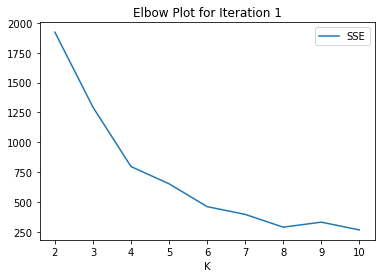

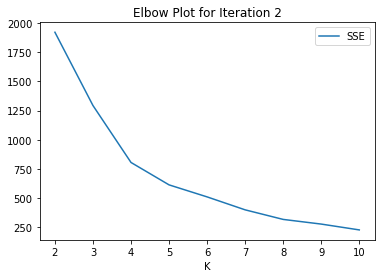

In [11]:
#getCentroidValues for two different random initialization

for iter in range(0,2): #two iterations
    
    print("\n Iteration : "+str(iter+1))
    
    muList=[] #Declare a list to hold the Sum of Squared error values
    
    
    #iterate from K=2 to 10
    for k in range(2,11):
        
        print("\n Clustering for K = "+ str(k))
        
        centroidList = []
        centroidArr = []
        Kval = "K="+ str(k)
        centroidDF = df
        
        #call ti init_centroid method to pick K centroids
        centroid = np.array(init_centroid(k,centroidDF)) 
        
        print("\n Centroids initialized for K = "+str(k))
        
        #iterate the objective function calculation till the model converges
        #Condition checks if the previous centroid Array(denoted by centroidArr) is equal to current centroid Array(denoted by centroid)
        while(np.array_equal(centroid,centroidArr)==False):
            
            df[Kval] = eucledianFunction(centroid,X)
            centroidList = []
            for j in range(1,k+1):
                a = df[Kval]==j
                b = df[a]                
                centroidList.append([np.mean(b['X']),np.mean(b['Y'])]) #calculate the mean of current centroid and store it in the object centroidList
            centroidArr = np.array(centroidList) #Convert new set of centroid in the centroidList object to array for calculation purpose
            
            #Swap previous centroid value with current centroid values
            temp = centroid
            centroid = centroidArr
            centroidArr = temp
            
           
        muList.append(centroidArr)
        print("\n End of K = "+str(k))
        
    print("\n The DataFrame after cluster assignment")
    print("\n" +str(df))
    
    #DataFrame to hold the value of K and the corresponding SSE value
    dfPlot = pd.DataFrame({'K':range(2,11),'SSE':0})
    
    #Calculate the SumOfSquaredError from the final list of clusters    
    for i in range(0,len(muList)):
        K='K='+str(i+2)
        dfPlot['SSE'][i] = calcSSE(muList[i],df,K)
    
    print("\n The Cluster value and its corresponding Sum of Squared Error values")
    print("\n"+str(dfPlot))
    
    #Plot the elbow plot
    print("\n The elbow plot for iteration "+str(iter+1)+" is shown at the bottom")   
    dfPlot.plot.line(x='K',y='SSE',title=("Elbow Plot for Iteration "+ str(iter+1)))
    